# Problem Statement

Let's assume that you work as a consultant to a start-up company that was looking to develp a model to estimate the cost of good sold as they vary the production volume (number of units produced). The startup gathered data and has asked you to develop a model to predict its cost vs. number of units sold. You thought a polynomial regression model might be a good candidate.

In [1]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the Dataset

df = pd.read_csv('EconomiesOfScale.csv')
df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [3]:
# Getting the Descriptive Summary Statistics

df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [4]:
# Get the Info of Each columns in the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Number of Units       1000 non-null float64
Manufacturing Cost    1000 non-null float64
dtypes: float64(2)
memory usage: 15.8 KB


In [5]:
# Identify is there are any missing value in the dataframe

pd.DataFrame({'Columns':df.isna().sum().index, 'No. of Missing Values': df.isna().sum().values, '% Missing': \
              df.isna().sum().values/len(df)})

,Columns,No. of Missing Values,% Missing
0,Number of Units,0,0.0
1,Manufacturing Cost,0,0.0


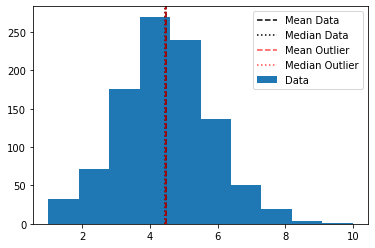

In [6]:
# Visualize the Mean, Median, Mode of the Dataset via Histogram

# Plot Histogram for Number of Units

plt.hist(df['Number of Units'], label= "Data");
plt.axvline(np.mean(df['Number of Units']), c='k', ls= "--", label= "Mean Data");
plt.axvline(np.median(df['Number of Units']), c='k', ls= ":", label= "Median Data");
plt.axvline(np.mean(df['Number of Units']), c='r', ls= "--", label= "Mean Outlier", alpha= 0.7);
plt.axvline(np.median(df['Number of Units']), c='r', ls= ":", label= "Median Outlier", alpha= 0.7);

plt.legend();
plt.show();

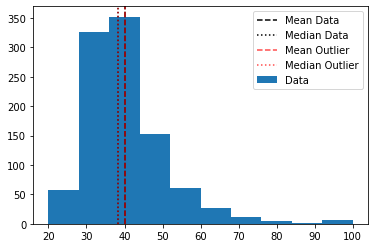

In [7]:
# Plot Histogram for Number of Units

plt.hist(df['Manufacturing Cost'], label= "Data");
plt.axvline(np.mean(df['Manufacturing Cost']), c='k', ls= "--", label= "Mean Data");
plt.axvline(np.median(df['Manufacturing Cost']), c='k', ls= ":", label= "Median Data");
plt.axvline(np.mean(df['Manufacturing Cost']), c='r', ls= "--", label= "Mean Outlier", alpha= 0.7);
plt.axvline(np.median(df['Manufacturing Cost']), c='r', ls= ":", label= "Median Outlier", alpha= 0.7);

plt.legend();
plt.show();

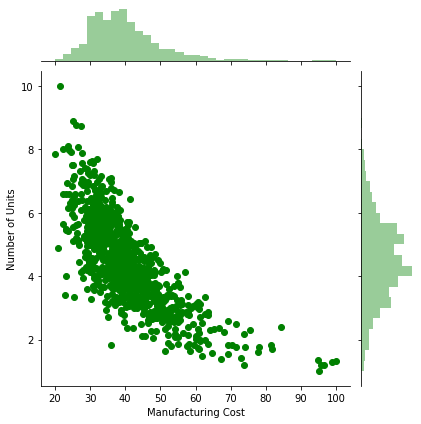

In [8]:
# Using Jointplot to Visualize the Distribution and Scatter

sns.jointplot(x='Manufacturing Cost', y='Number of Units', data = df, color = 'green');

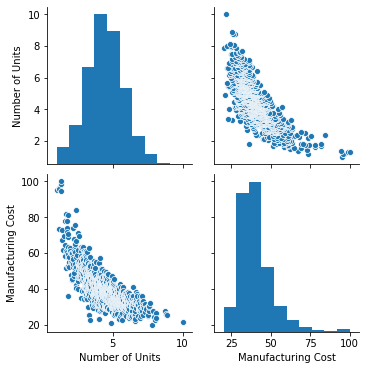

In [9]:
# Use PairPlot to visualize the paired data

sns.pairplot(df);

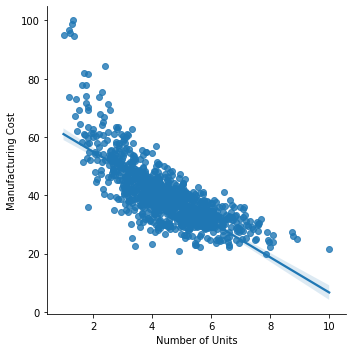

In [11]:
# Add Just a Straightline to data

sns.lmplot(y='Manufacturing Cost', x='', data= df);
# It Just Fits a line to Data, not via any mathematical modelling

## Modelling the Machine Learning

In [12]:
X = df[["Number of Units"]] # This is a DataFrame
y = df["Manufacturing Cost"] # This can be a Series

### Try Using Linear Regression

Linear Model Coefficient with Intercept (m):  [-6.0333683]
Linear Model Coefficient with Intercept (b):  67.03904193389238
Linear Model Coefficient with No Intercept (m):  [7.72782912]
Linear Model Coefficient with No Intercept (b):  0.0


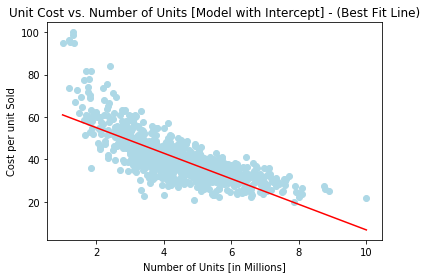

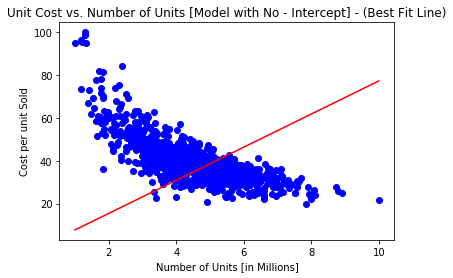

In [15]:
from sklearn.linear_model import LinearRegression

# Apply Linear Regression Model with Intercept
regressor1 = LinearRegression(fit_intercept = True)
regressor1.fit(X,y)

# Apply Linear Regression Model with No Intercept
regressor2 = LinearRegression(fit_intercept = False)
regressor2.fit(X,y)

# Getting the Coefficients

print('Linear Model Coefficient with Intercept (m): ', regressor1.coef_)
print('Linear Model Coefficient with Intercept (b): ', regressor1.intercept_)

print('Linear Model Coefficient with No Intercept (m): ', regressor2.coef_)
print('Linear Model Coefficient with No Intercept (b): ', regressor2.intercept_)

# Visualize the Model - For Model with Intercept

plt.scatter(X, y, color = 'lightblue')
plt.plot(X, regressor1.predict(X), color = 'red')
plt.ylabel('Cost per unit Sold')
plt.xlabel('Number of Units [in Millions]')
plt.title('Unit Cost vs. Number of Units [Model with Intercept] - (Best Fit Line)');
plt.show();
# Visualize the Model - For Model with No Intercept

plt.scatter(X, y, color = 'blue')
plt.plot(X, regressor2.predict(X), color = 'red')
plt.ylabel('Cost per unit Sold')
plt.xlabel('Number of Units [in Millions]')
plt.title('Unit Cost vs. Number of Units [Model with No - Intercept] - (Best Fit Line)');
plt.show();

### Using Polynomial Regression


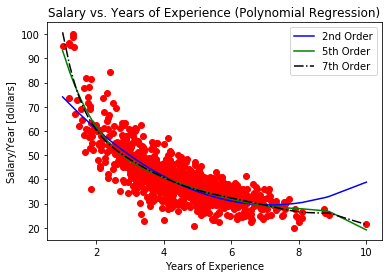

In [22]:
from sklearn.preprocessing import PolynomialFeatures

# Instantiate the Class with Multiple Degrees
poly_regressor_2 = PolynomialFeatures(degree= 2)
poly_regressor_5 = PolynomialFeatures(degree= 5)
poly_regressor_7 = PolynomialFeatures(degree= 7)

# Fit the Data

X_columns_2 = poly_regressor_2.fit_transform(X)
X_columns_5 = poly_regressor_5.fit_transform(X) 
X_columns_7 = poly_regressor_7.fit_transform(X)

# Now Initiate Linear Regression Model 

regressor_2 = LinearRegression()
regressor_5 = LinearRegression()
regressor_7 = LinearRegression()

# Fit the LR Model to the polynomial Dataset
regressor_2.fit(X_columns_2, y)
regressor_5.fit(X_columns_5, y)
regressor_7.fit(X_columns_7, y)

# Plotting the Results by Predicting the polynomial Regression Data

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor_2.predict(X_columns_2), color = 'blue', label= "2nd Order")
plt.plot(X, regressor_5.predict(X_columns_5), color = 'green', label= "5th Order")
plt.plot(X, regressor_7.predict(X_columns_7), color = 'black', ls= "-.", label= "7th Order")
plt.ylabel('Salary/Year [dollars]')
plt.xlabel('Years of Experience')
plt.title('Salary vs. Years of Experience (Polynomial Regression)');
plt.legend(loc= 'best');